# Data

The data are stored as a CSV. Each data file contains 5 columns:

`count` = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

`hate_speech` = number of CF users who judged the tweet to be hate speech.

`offensive_language` = number of CF users who judged the tweet to be offensive.

`neither` = number of CF users who judged the tweet to be neither offensive nor non-offensive.

`class` = class label for majority of CF users.
  0 - hate speech
  1 - offensive  language
  2 - neither

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load data
data = pd.read_csv('labeled_data.csv')

# Display data
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [105]:
# Display data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [106]:
# Display data description
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [107]:
# Display data class distribution
data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

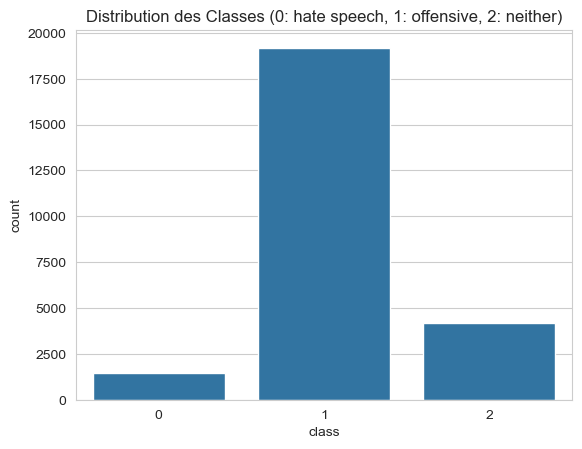

In [108]:
# Display data class distribution
import seaborn as sns

sns.countplot(x='class', data=data)
plt.title('Distribution des Classes (0: hate speech, 1: offensive, 2: neither)')
plt.show()

In [109]:
# drop useless unnamed column
data.drop(columns=['Unnamed: 0'], inplace=True)

data.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [110]:
# Check random tweet from each class

print('Hate Speech:')
print(data[data['class'] == 0]['tweet'].values[0])

print('Offensive Language:')
print(data[data['class'] == 1]['tweet'].values[0])

print('Neither:')
print(data[data['class'] == 2]['tweet'].values[0])

Hate Speech:
"@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer" gaywad
Offensive Language:
!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
Neither:
!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...


In [111]:
# Let's concatenate offensive and hate speech classes

data['class'] = data['class'].apply(lambda x: 1 if x in [0, 1] else 0)

# cut the data to 4000 samples for each class

nb_samples = 2000

data = pd.concat([
    data[data['class'] == 1].sample(nb_samples, random_state=42),
    data[data['class'] == 0].sample(nb_samples, random_state=42)
])

data['class'].value_counts()

class
1    2000
0    2000
Name: count, dtype: int64

Those are tweets so we need to clean them like removing special characters, links, @mentions, etc.

In [112]:
def clean_text(text):
    # rm @mentions
    text = re.sub(r'@\w+', '', text)

    # rm RT
    text = re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)

    # rm hashtags
    text = re.sub(r'#\w+', '', text)

    # rm links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # rm special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # rm extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # lowercase
    text = text.lower()

    return text

data['tweet'] = data['tweet'].apply(clean_text)

data.head()

,count,hate_speech,offensive_language,neither,class,tweet
7430,3,0,3,0,1,a girlfriend is almost a bill lowkey so at this point in my life where i should be gettin outta my moms crib ill rather just have hoes
19496,3,0,3,0,1,bitch nigga
19218,3,0,3,0,1,fuck ur wcwlet me see wat ur current bitch look like oowe
22117,3,0,3,0,1,this niggah is a fool
10151,3,0,3,0,1,i cheated on of the bitches i had tf lol nobody even wanted to be all committed and shit


In [113]:
X=data['tweet'].tolist()
y=data['class'].tolist()

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# create huggingface dataset
from datasets import Dataset

train_dataset = Dataset.from_dict({'text': X_train, 'label': y_train})
test_dataset = Dataset.from_dict({'text': X_test, 'label': y_test})

In [116]:
# Load tokenizer and model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, TrainingArguments

model_name = "distilbert-base-multilingual-cased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

/Users/maxoum/miniconda3/envs/nlp-env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [117]:
# Tokenize data

def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

In [118]:
import torch
from transformers import Trainer
import accelerate
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

print("PyTorch version:", torch.__version__)
print("Accelerate version:", accelerate.__version__)


PyTorch version: 2.5.1
Accelerate version: 0.23.0


In [119]:
torch.set_num_threads(8)  # On fixe le nombre de threads à 8

print(torch.get_num_threads())  # Nombre de threads utilisés

8


In [ ]:
# Define metrics

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary", zero_division=0)
    accuracy = accuracy_score(labels, predictions)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

# Define training arguments

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=5e-4,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    dataloader_num_workers=6,
    report_to="none",
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

python(54753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [75]:
trainer.evaluate()

python(54065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


{'eval_loss': 0.3362252712249756,
 'eval_accuracy': 0.895,
 'eval_precision': 0.9485714285714286,
 'eval_recall': 0.8341708542713567,
 'eval_f1': 0.8877005347593583,
 'eval_runtime': 46.6229,
 'eval_samples_per_second': 8.579,
 'eval_steps_per_second': 0.536,
 'epoch': 3.0}

In [76]:
# Save model
model.save_pretrained('distilbert-toxicity')

# Save tokenizer
tokenizer.save_pretrained('distilbert-toxicity')

('distilbert-toxicity/tokenizer_config.json',
 'distilbert-toxicity/special_tokens_map.json',
 'distilbert-toxicity/vocab.txt',
 'distilbert-toxicity/added_tokens.json')

In [80]:
# Load model
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

model = DistilBertForSequenceClassification.from_pretrained('distilbert-toxicity')

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-toxicity')


/Users/maxoum/miniconda3/envs/nlp-env/lib/python3.10/site-packages/transformers/modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkp

In [85]:
model.eval()

def predict_toxicity(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)

    with torch.no_grad():
        logits = model(**inputs).logits

    # Convertir les logits en probabilités
    probabilities = torch.nn.functional.softmax(logits, dim=1).squeeze().tolist()

    # Retourner le pourcentage pour chaque classe
    toxic_pct = probabilities[1] * 100
    non_toxic_pct = probabilities[0] * 100

    return {"Non-toxic": non_toxic_pct, "Toxic": toxic_pct}

# Exemple d'utilisation
sentence = ""
result = predict_toxicity(sentence)

print(result)

{'Non-toxic': 89.17442560195923, 'Toxic': 10.819506645202637}
